### Transform Functions

In [3]:
from torchvision import transforms
transform2 = transforms.Compose([#vgg16 
    transforms.Resize((299, 299)),
    transforms.ToTensor(), # ToTensor image ko convert karta hai pixelated values ye pytorch tensor me ie [0,1]
    transforms.Normalize(  #Normalize scale karta hai image ko [-1,1] me    
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform3 = transforms.Compose([ #resnet
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]
                         )
])



transform4 = transforms.Compose([#mobilenetv2 
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


### Testing the transform functions 

C:\Users\hardi\Downloads\archive\MepcoTropicLeaf-V1\Database\Asthma Plant.zip\001_0.jpg


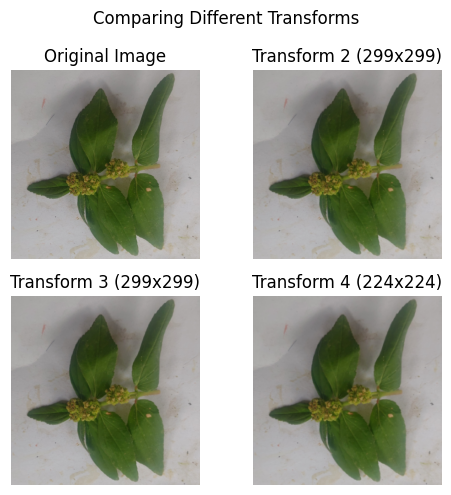

In [4]:
# Testing each transform on a sample image
import matplotlib.pyplot as plt
from torchvision import datasets
from PIL import Image

# Load a sample image from the dataset
sample_img_path = "C:\\Users\\hardi\\Downloads\\archive\\MepcoTropicLeaf-V1\\Database"
sample_img = datasets.ImageFolder(sample_img_path).imgs[0][0]  # Get first image path
img = Image.open(sample_img)

print(sample_img)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle('Comparing Different Transforms')

# Original image
axes[0,0].imshow(img)
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

# Transform 2
img_t2 = transform2(img)
img_t2 = img_t2.permute(1,2,0).numpy()  # Convert from CxHxW to HxWxC
img_t2 = (img_t2 * 0.5 + 0.5).clip(0, 1)  # Denormalize
axes[0,1].imshow(img_t2)
axes[0,1].set_title('Transform 2 (299x299)')
axes[0,1].axis('off')

# Transform 3
img_t3 = transform3(img)
img_t3 = img_t3.permute(1,2,0).numpy()
img_t3 = (img_t3 * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)  # Denormalize
axes[1,0].imshow(img_t3)
axes[1,0].set_title('Transform 3 (299x299)')
axes[1,0].axis('off')

# Transform 4
img_t4 = transform4(img)
img_t4 = img_t4.permute(1,2,0).numpy()
img_t4 = (img_t4 * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)  # Denormalize
axes[1,1].imshow(img_t4)
axes[1,1].set_title('Transform 4 (224x224)')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### IMPORTING THE DATASET

In [12]:
from torchvision import datasets
# from google.colab import drive
# drive.mount('/content/drive')
# dataset=datasets.ImageFolder("/content/drive/MyDrive/patta /archive/MepcoTropicLeaf-V1/Database", transform=transform3)
dataset=datasets.ImageFolder("C:\\Users\\hardi\\Downloads\\archive\\MepcoTropicLeaf-V1\\Database", transform=transform3)
dataset

Dataset ImageFolder
    Number of datapoints: 3777
    Root location: C:\Users\hardi\Downloads\archive\MepcoTropicLeaf-V1\Database
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

### Splitting the dataset

In [6]:
import numpy as np
indices=list(range(len(dataset))) # dataset ko numerate karne ke liye
split=int(np.floor(0.70*len(dataset)))
validation=int(np.floor(0.60*split))

# agar tmre pass 100 samples hai
# toh split=70(ie 70% of the dataset)-> ee use hoga training and validation ke liye; remaining (30)30% used hoga as test set
# tb validation=42 (ie 60% of the dataset)-> ee use hoga for training ke liye; remaining (28)40% used hoga as Validation set 
# toh phir training= 42%; validation= 28%; test=30%

print(f"length of train size : {validation}")  
print(f"length of validation size : {split-validation}")  
print(f"length of test size : {len(dataset)-split}")  

np.random.shuffle(indices) # dataset me randomness laane ke liye

# ab actual splitting 
train_indices, validation_indices, test_indices = (
    indices[:validation], # [:5]->0,1,2,3,4
    indices[validation:split],# [1:3]->1,2
    indices[split:],# [2:]-> 2,3,4,5,........
)

from torch.utils.data.sampler import SubsetRandomSampler #randomly shuffles the dataset
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

# print(list(train_indices))
# print(list(validation_indices))
# print(list(test_indices))

# print(list(train_sampler))
# print(list(validation_sampler))
# print(list(test_sampler))


length of train size : 1585
length of validation size : 1058
length of test size : 1134


In [7]:
targets_size = len(dataset.class_to_idx)# finding the total unique classes and storing it
print(targets_size)

#print(list(dataset.class_to_idx.keys()))

num_classes_list = list(dataset.class_to_idx.values())# now numerating them
print(num_classes_list)

50
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### Loading the Models

In [8]:
from torchvision import models
model = models.vgg16(pretrained=True)#if pretrained=false, tb saare layes ko hmlog ko individually map karna hoga
model2=models.mobilenet_v2(pretrained=True)
model3=models.resnet18(pretrained=True)

# model 
# model2
# model3 

for params in model3.parameters(): 
   params.requires_grad = True
# resnet18 ke saare parameters ko trainable bana rhe hai; resnet ka feature extraction acha kaam karra hai isliye use krre plus accuracy bhi increase ho rha  
# mobilenet aur vgg complex models hai (more param and layers), agar isko(function) use kare toh model overfit ho sakta  

C:\Users\hardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\hardi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning:

### Extracting different feature sizes from VGG16, MobileNetV2, and ResNet18

In [9]:
n_features = model.classifier[0].in_features #vgg16; number of input features in the first fully connected layer
print(1, n_features)
n_features = model2.classifier[1].in_features #mobilenet; number of input features in the first fully connected layer
print(2, n_features)
n_features = model3.conv1.in_channels #resnet18; number of input features in the first convolutional layer
print(3, n_features)

# ee kyu krre?-> taaki pata chale ki input and output features pata chale
# Last layer change karke model ko apne data pe train karre hai.  
# Pehle wali layers ko rakhne ka fayda->  
# Ye layers already trained hota h aur feature extraction achha kar leta h.  
# Sirf last layer train karne se kam computation time lagega.  
# Kam data hone par bhi model achha perform karega, kyunki pehle se trained layers use ho rahi hain.  
# Isko *Transfer Learning kehte hain 

1 25088
2 1280
3 3


### overriding the calculations to GPU if available

In [10]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device) #checking if GPU is available
model.to(device)
model2.to(device)
model3.to(device)#shifting the model to 'device' for computing

#summarizing the layers of all models; helps validate the model before training, avoiding errors later.

from torchsummary import summary
print(1, summary(model, (3, 224, 224)))
print(2, summary(model2, (3, 224, 224)))
print(3, summary(model3, (3, 224, 224))) 

#output shape [-1,c,h,w]
#c->no of filters/ channels
#h,w-> feature map size after operation

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 

In [11]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
# calculates the loss during training, which will be later used by backpropagation to imporove the models accuracy
optimizer = torch.optim.Adam(model3.parameters())  
#adam optimiser is used to optimise the models parameters(weights of the model) to minimise the loss and hence increase the accuracy

### Gradient descent 


In [ ]:
data_transforms = {
    'train_loader': transforms.Compose([
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), shear=5) , # image ko randomly rotate karne ke liye
        transforms.ColorJitter(hue=0.05, saturation=0.05), # naam jo suggest karta hai
        transforms.RandomHorizontalFlip(), #randomly image ko flip kar deta hai 50% probability saath
        transforms.Grayscale(num_output_channels=1), #image is converted to black and white when =1; when=3 it is converted to fake RGB
        transforms.RandomApply([transforms.GaussianBlur(kernel_size=7)], p=0.2), # randomly applies Gaussian blur with probability=20%;
                                                                                 # kernel size=7->moderate blur; 3->light blur; 15->heavy blur
        transforms.ToTensor(),#image ko convert karta hai pixelated values ye pytorch tensor me ie [0,1]
        transforms.Normalize((0.5,), (0.5,)),#pixelated values from [0,1] to [-1,1]
    ]),
    'validation_loader': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])
}

In [ ]:
batch_size = 64 # why 64; mediocre hota hai
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

In [ ]:
from datetime import datetime
def batch_gd(model, criterion, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            train_loss.append(loss.item())  # torch to numpy world; graph plot karne ke liye 
            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)
        validation_loss = []
        for inputs, targets in validation_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            loss = criterion(output, targets)
            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)
        train_losses[e] = train_loss
        dt = datetime.now() - t0
        print(f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Duration:{dt}")

    return train_losses

### Asli kaam ab hoga 

In [ ]:
train_losses = batch_gd(model3, criterion, train_loader, validation_loader, 10)

In [ ]:
import matplotlib.pyplot as plt 
# Fetch a batch of images and labels
data_iterator = iter(train_loader)
images, labels = next(data_iterator)

# Define the inverse transform to undo normalization
inverse_transform = transforms.Compose([
    transforms.Normalize(mean=[0, 0, 0], std=[1/0.5, 1/0.5, 1/0.5]),
    transforms.ToPILImage()
])

# Apply inverse transform to the first image in the batch
image_to_show = inverse_transform(images[0]).convert("RGB")

# Display the image with its corresponding label
plt.imshow(image_to_show)
plt.title(f"Label: {labels[0]}")
plt.axis("off")
plt.show()


### Accuracy

In [ ]:
def accuracy(loader):
    n_correct = 0
    n_total = 0
    model3.cuda()
    for inputs, targets in loader:
        inputs, targets = inputs.cuda(), targets.cuda()
        outputs = model3(inputs)
        #print(outputs)
        _, predictions = torch.max(outputs, 1)
        n_correct += (predictions == targets).sum().item()
        n_total += targets.shape[0]

    acc = n_correct / n_total
    return acc

train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

print(f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}")

In [ ]:
plt.plot(train_losses , label = 'train_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()